In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()

In [2]:
#read data from csv
#article
articles_df = pd.read_csv("./data/articles.csv")
articles_df.head()
##Exploration
articles_df
print(f"Length of articles: {len(articles_df)}")


Length of articles: 105542


In [3]:
##Exploration
articles_df
print(f"Length of articles: {len(articles_df)}")
print(f"Columns of articles data frame: {list(articles_df.columns)}")
articles_df.head()

Length of articles: 105542
Columns of articles data frame: ['article_id', 'product_code', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code', 'colour_group_name', 'perceived_colour_value_id', 'perceived_colour_value_name', 'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 'department_name', 'index_code', 'index_name', 'index_group_no', 'index_group_name', 'section_no', 'section_name', 'garment_group_no', 'garment_group_name', 'detail_desc']


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


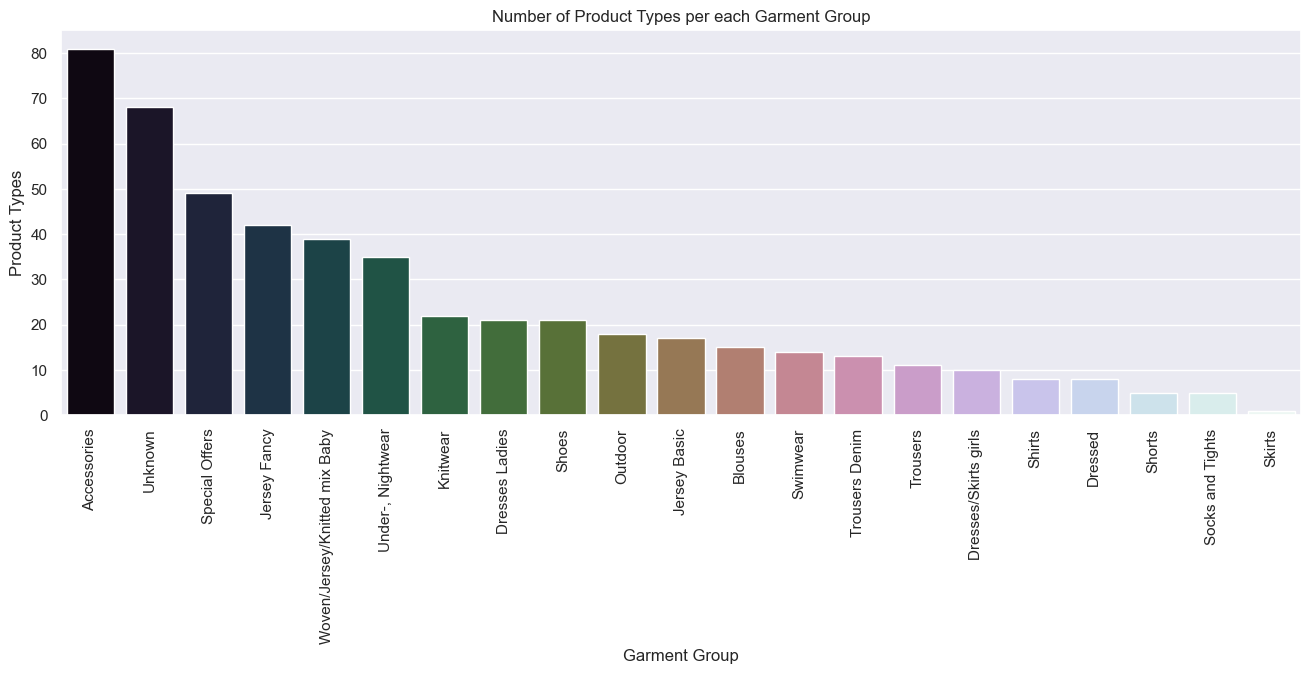

In [3]:
temp = articles_df.groupby(["garment_group_name"])["product_type_name"].unique()
df = pd.DataFrame({"Garment Group": temp.index, "Product Types": temp.values})
df = df.sort_values(["Product Types"], ascending=False)
plt.figure(figsize=(16, 5))
plt.title("Number of Product Types per each Garment Group")
s = sns.barplot(x="Garment Group", y="Product Types", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=45)
locs, labels = plt.xticks()
plt.show()

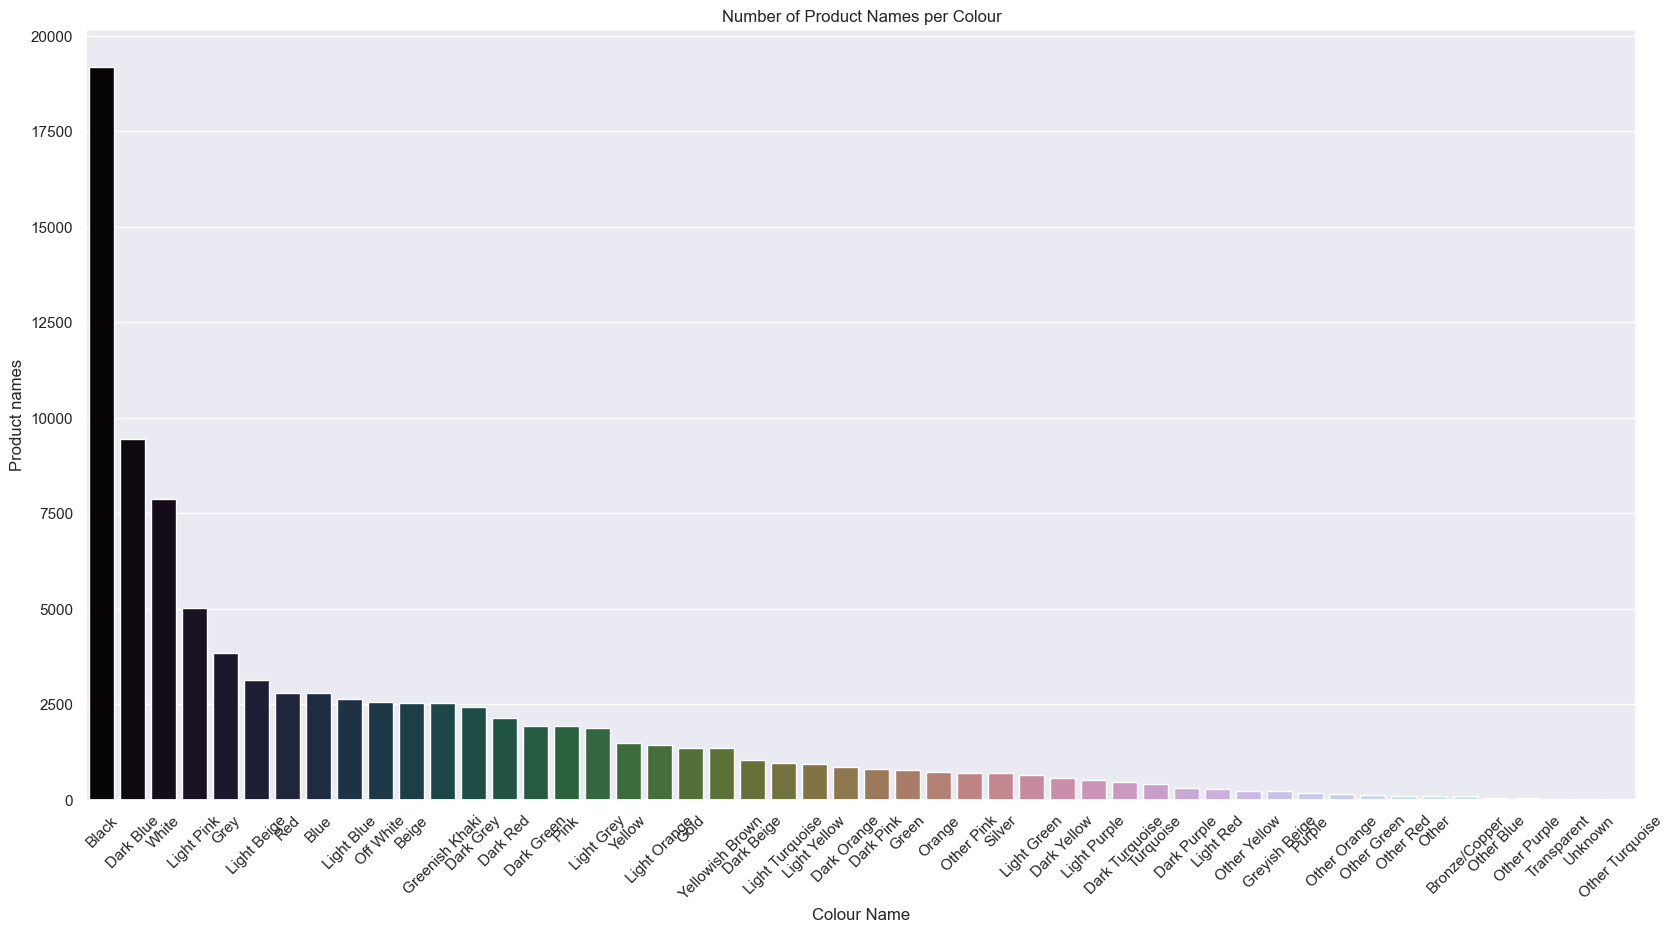

In [16]:
temp = articles_df.groupby(["colour_group_name"])["product_code"].nunique()
temp
df = pd.DataFrame({"Colour Name": temp.index, "Product names": temp.values})
df = df.sort_values(["Product names"], ascending=False)
plt.figure(figsize=(20, 10))
plt.title(
    "Number of Product Names per Colour"
)
s = sns.barplot(x="Colour Name", y="Product names", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=45)
locs, labels = plt.xticks()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

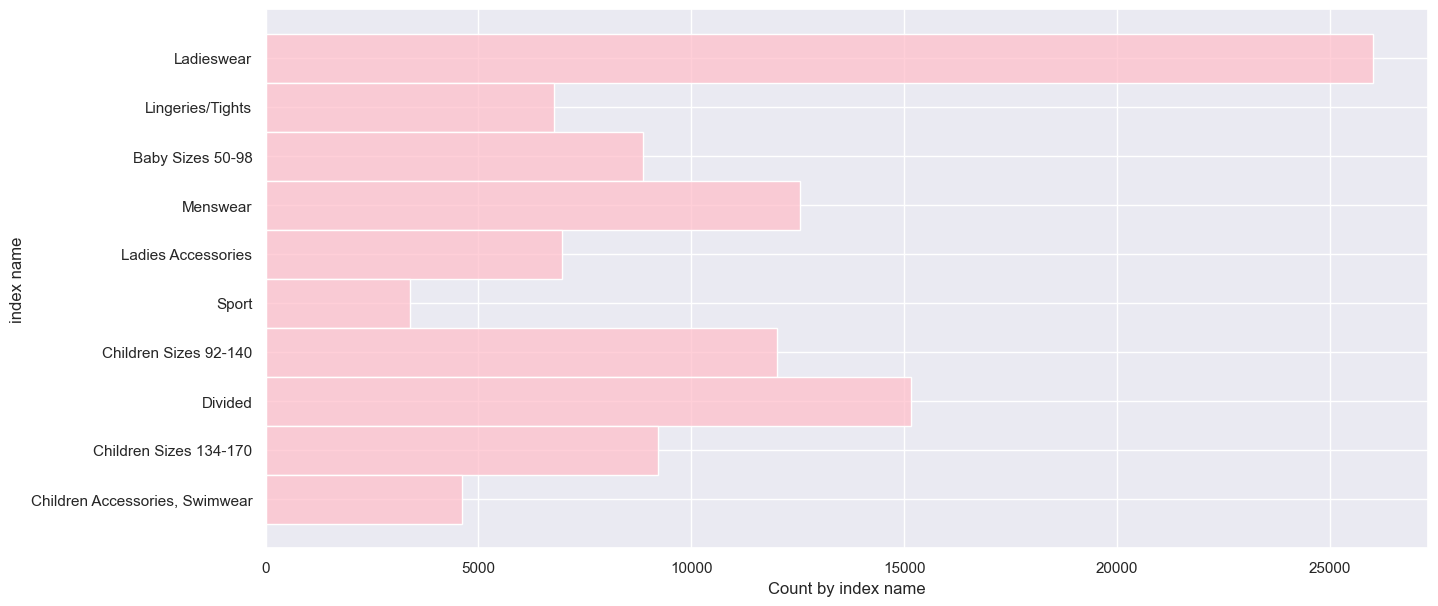

In [12]:
plt.figure(figsize=(15,7))
s = sns.histplot(data = articles_df, y='index_name', color='pink')
s.set_xlabel("Count by index name")
s.set_ylabel('index name')
plt.show
